# Big price fluctuation prediction with volatility

The objective of this logistic regression project is to predict when will a big price fluctuation occur for a given stock. For the purpose of this project a 3% price fluctuation will be considered a big price fluctuation.

The project will analyze Facebook stock with data from the last 5 years, downloaded on March 20th from Yahoo Finance. Dataset is available in CSV format in the project folder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_file = "FB.csv"

In [3]:
df = pd.read_csv(data_file)
df['Total Change'] = df['High']-df['Low']
df['% Change'] = (df['Total Change']/df['Open'])*100
df['Big Change'] = abs(df['% Change']) > 3
def numberize(b):
    if b:
        return 1
    else:
        return 0
df['Big Change'] = df['Big Change'].apply(numberize)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Change,% Change,Big Change
0,2013-03-19,26.530001,26.900000,26.209999,26.549999,26.549999,25254200,0.690001,2.600833,0
1,2013-03-20,26.680000,26.690001,25.780001,25.860001,25.860001,44006500,0.910000,3.410795,1
2,2013-03-21,25.660000,26.110001,25.559999,25.740000,25.740000,24336100,0.550002,2.143422,0
3,2013-03-22,25.799999,26.010000,25.629999,25.730000,25.730000,18456300,0.380001,1.472872,0
4,2013-03-25,25.750000,25.799999,25.080000,25.129999,25.129999,39199000,0.719999,2.796113,0


Now we want to predict the big change parameter being true or false according to volume.

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Total Change,% Change,Big Change
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.000000,1260.000000
mean,99.664524,100.618778,98.628000,99.681429,99.681429,3.392464e+07,1.990778,2.220268,0.200794
std,44.233326,44.443587,43.964803,44.245240,44.245240,2.669753e+07,1.236709,1.277402,0.400753
min,22.990000,23.090000,22.670000,22.900000,22.900000,5.913100e+06,0.330000,0.370902,0.000000
25%,67.902500,68.405002,66.900002,67.855002,67.855002,1.761850e+07,1.220001,1.338292,0.000000
50%,94.015003,95.285000,92.975003,94.180000,94.180000,2.525430e+07,1.699999,1.933722,0.000000
75%,128.657494,129.272503,127.807503,128.690002,128.690002,4.203175e+07,2.399996,2.719454,0.000000
max,192.039993,195.320007,189.979996,193.089996,193.089996,3.654579e+08,10.360000,13.098788,1.000000


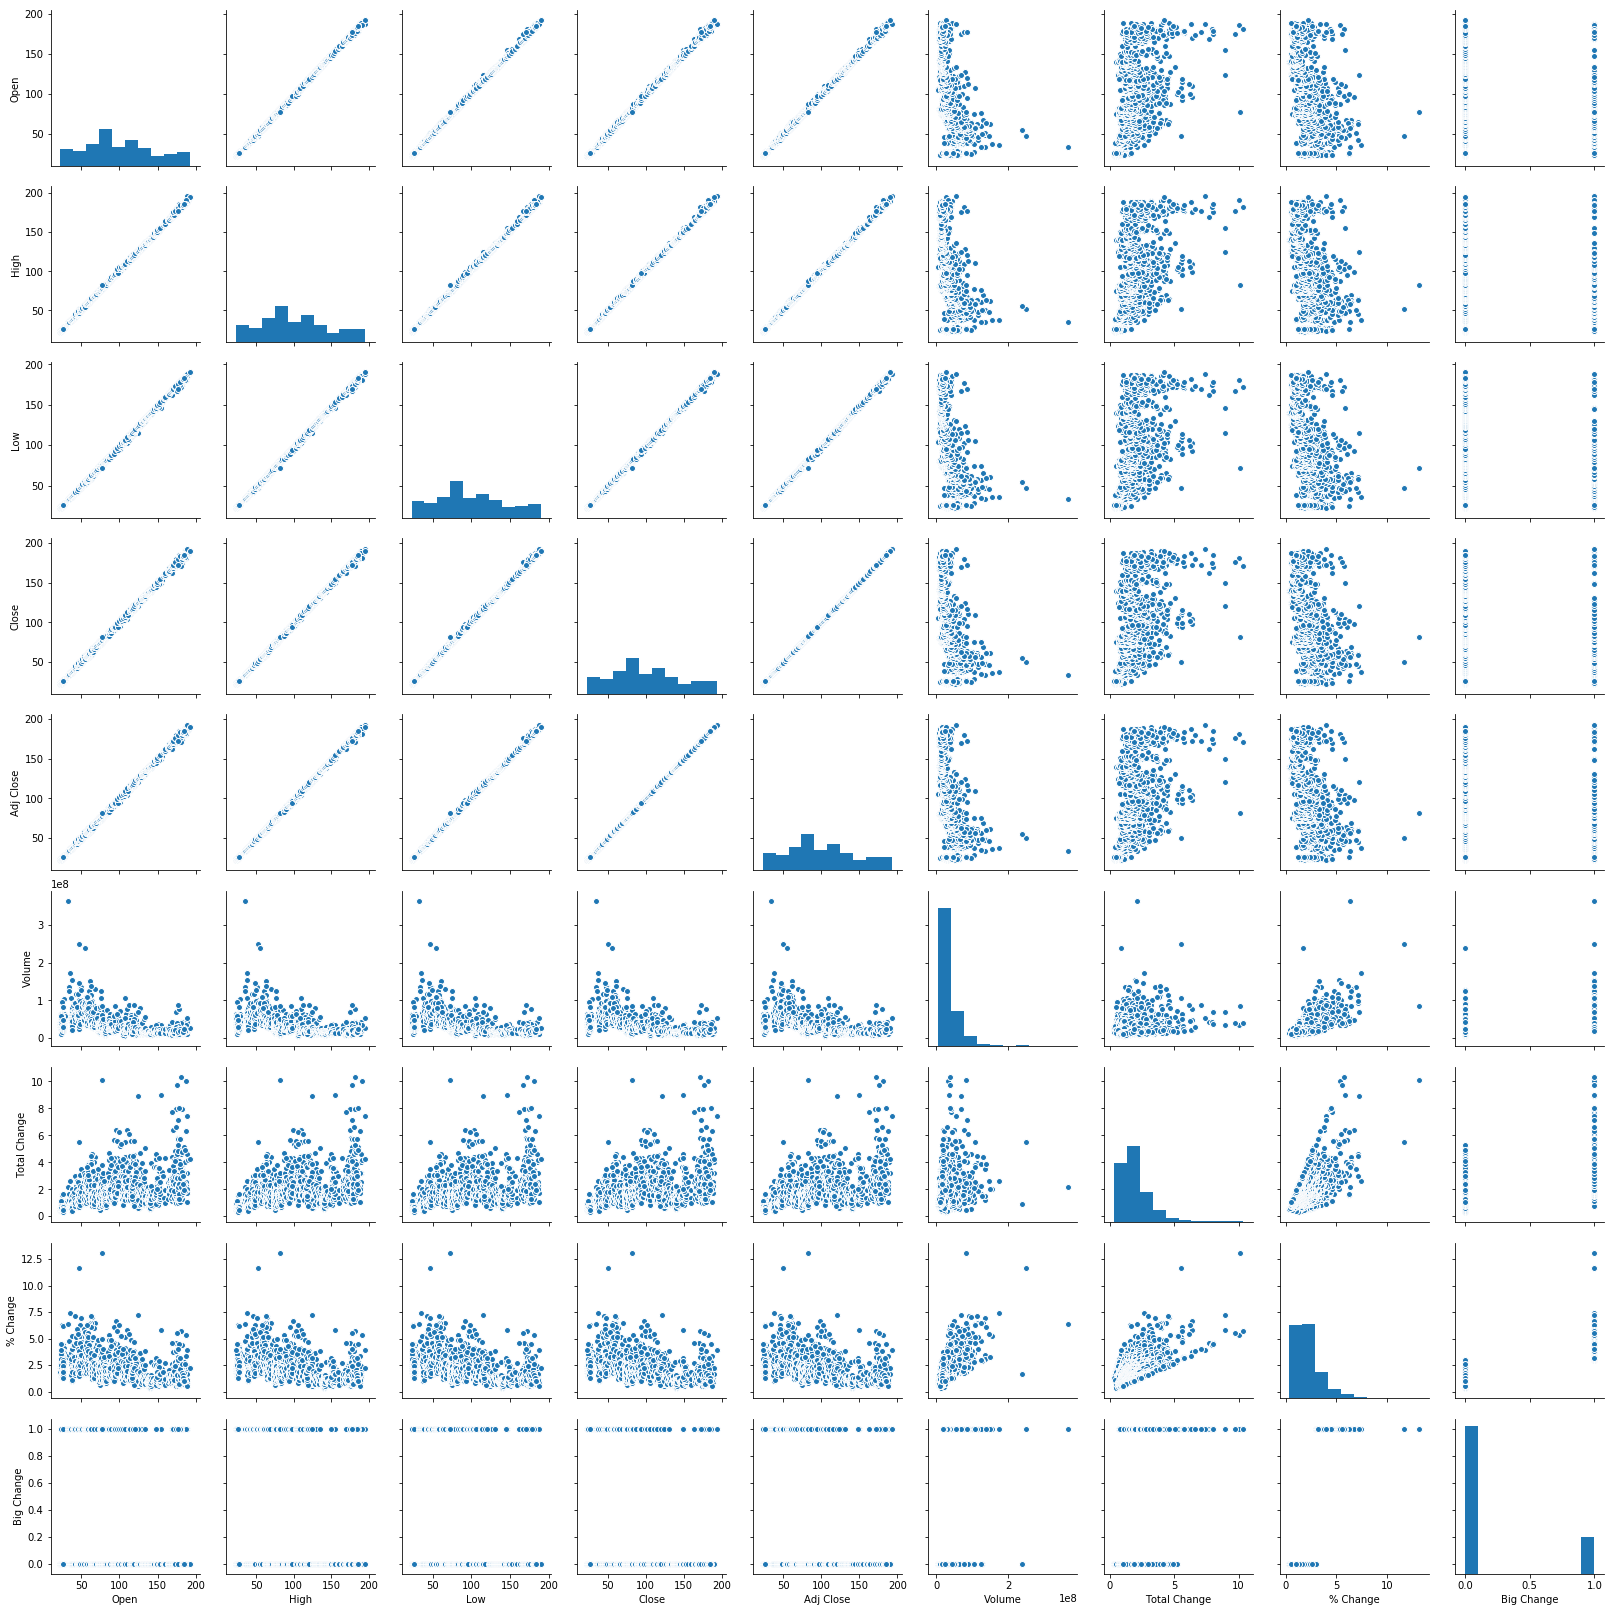

In [5]:
sns.pairplot(df)

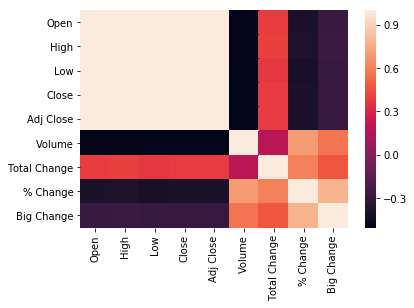

In [6]:
sns.heatmap(df.corr())

Let's start our prediction by splitting the data into a test and a training dataset

In [26]:
x = df.columns[1:-3]
print(x)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [27]:
x = df[x]
y = df['Big Change']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Let's tain our model

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's evaluate our model

In [12]:
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

             precision    recall  f1-score   support

          0       0.81      1.00      0.89       203
          1       0.00      0.00      0.00        49

avg / total       0.65      0.81      0.72       252



/home/albert/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[203,   0],
       [ 49,   0]])

In [13]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
logmodel.coef_

array([[-2.11106956e-13, -2.12215858e-13, -2.10507631e-13,
        -2.11511002e-13, -2.11511002e-13, -8.69520458e-09]])

Now let's train a model which tries to predict *Big change* by only looking at *volume*

In [51]:
x2 = df[['Volume']]
y2 = df['Big Change']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
logmodel2 = LogisticRegression()
print(x2_train.head())
logmodel2.fit(x2_train,y2_train)

        Volume
371   28183000
1058  18023900
913   15669000
36    33457200
352   24591000


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's evaluate our model

In [52]:
predictions2 = logmodel2.predict(x2_test)
print(classification_report(y2_test,predictions2))
confusion_matrix(y2_test,predictions2)

             precision    recall  f1-score   support

          0       0.77      1.00      0.87       195
          1       0.00      0.00      0.00        57

avg / total       0.60      0.77      0.68       252



/home/albert/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[195,   0],
       [ 57,   0]])

In [53]:
print(predictions2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [54]:
logmodel2.coef_

array([[-1.05028392e-08]])